In [1]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import pandas as pd
import scorecardpy as sc
import numpy as np
import math
import random

In [2]:
df=  pd.read_csv('creditcard.csv')
df=df.drop(['Time','Amount'],axis=1)
df = df.astype(float)

train, test = sc.split_df(df, y = 'Class',ratio = 0.7, seed = 32491565).values()
train["index"] = range(1, len(train) + 1)
train = train.set_index("index")
test["index"] = range(1, len(test) + 1)
test = test.set_index("index")

X = train.iloc[:,0:28]
y=pd.DataFrame(train['Class'])

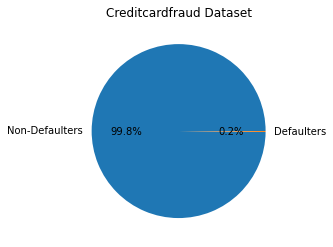

In [48]:
import matplotlib.pyplot as plt

Tasks = [284315,492]

my_labels = 'Non-Defaulters','Defaulters'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Creditcardfraud Dataset')
plt.axis()
plt.show()

In [3]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(X, y)

In [4]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_16 <= -2.70
|   |--- feature_9 <= -1.98
|   |   |--- class: 1.0
|   |--- feature_9 >  -1.98
|   |   |--- class: 0.0
|--- feature_16 >  -2.70
|   |--- feature_13 <= -8.10
|   |   |--- class: 1.0
|   |--- feature_13 >  -8.10
|   |   |--- class: 0.0



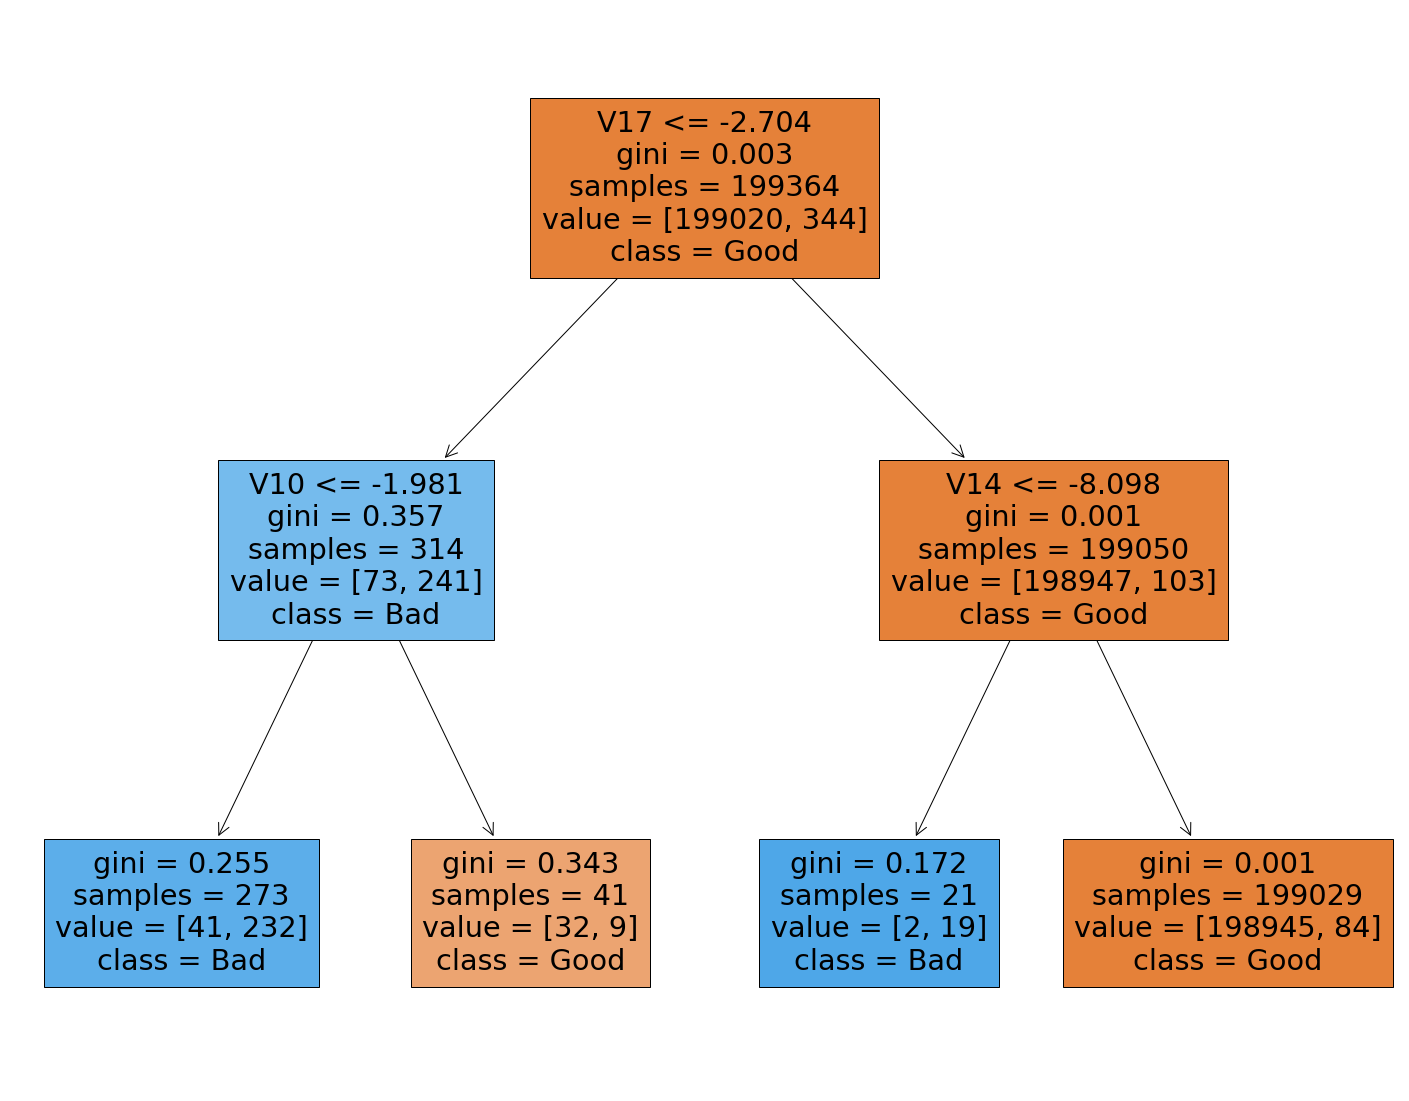

In [5]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(X.columns.values),  
                   class_names=['Good','Bad'],
                   filled=True)

In [6]:
y=train[train['V17']<=-2.704]
y2=train[train['V17']>-2.704]

one=y[y['V10']<=-1.981]
one["index"] = range(1, len(one) + 1)
one = one.set_index("index")

two=y[y['V10']>=-1.981]
two["index"] = range(1, len(two) + 1)
two = two.set_index("index")

three=y2[y2['V14']<= -8.098]
three["index"] = range(1, len(three) + 1)
three = three.set_index("index")

four=y2[y2['V14']>= -8.098]
four["index"] = range(1, len(four) + 1)
four = four.set_index("index")

/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_16088/1713027399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one["index"] = range(1, len(one) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_16088/1713027399.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two["index"] = range(1, len(two) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_16088/1713027399.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [7]:
y=test[test['V17']<=-2.704]
y2=test[test['V17']>-2.704]

onetest=y[y['V10']<=-1.981]
onetest["index"] = range(1, len(onetest) + 1)
onetest = onetest.set_index("index")

twotest=y[y['V10']>=-1.981]
twotest["index"] = range(1, len(twotest) + 1)
twotest = twotest.set_index("index")

threetest=y2[y2['V14']<= -8.098]
threetest["index"] = range(1, len(threetest) + 1)
threetest = threetest.set_index("index")

fourtest=y2[y2['V14']>= -8.098]
fourtest["index"] = range(1, len(fourtest) + 1)
fourtest = fourtest.set_index("index")

/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_16088/1997349695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onetest["index"] = range(1, len(onetest) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_16088/1997349695.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twotest["index"] = range(1, len(twotest) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_16088/1997349695.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

# THOMPSON SAMPLING

In [8]:
alpha1,alpha2,alpha3,alpha4=0,0,0,0
beta1,beta2,beta3,beta4=0,0,0,0

betad1=random.betavariate(alpha1+1,beta1+1)
betad2=random.betavariate(alpha2+1,beta2+1)
betad3=random.betavariate(alpha3+1,beta3+1)
betad4=random.betavariate(alpha4+1,beta4+1)

tsreward=[]
reward=0
regretts=[]
regret=0

for val in range(1,22,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad3':betad3,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1 
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(22,42,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(42,274,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)    
    
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(274,199030,1):
    chosencustomer=''
    customer4=four.loc[val]
    
    dictofbeta={'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)    
    
    betad4=random.betavariate(alpha4+1,beta4+1)

In [9]:
print(betad1,betad2,betad3,betad4)

0.09152579801926389 0.5223903918172836 0.014947983457586692 0.9995028591100226


In [10]:
testprofitts=[]
betad1=random.betavariate(alpha1+1,beta1+1)
betad2=random.betavariate(alpha2+1,beta2+1)
betad3=random.betavariate(alpha3+1,beta3+1)
betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(1,15,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad3':betad3,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1 
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(15,19,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(19,120,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)   
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad4=random.betavariate(alpha4+1,beta4+1)

for val in range(120,85293,1):
    chosencustomer=''
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad4':betad4}

    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    testprofitts.append(profit)
    tsreward.append(reward)
    
    betad4=random.betavariate(alpha4+1,beta4+1)

In [11]:
print(betad1,betad2,betad3,betad4)

0.4917449202048612 0.888686537261678 0.7136251055104942 0.9995147091129484


In [12]:
ts=pd.DataFrame()
ts['reward']=tsreward
ts['cum_reward']=ts['reward'].cumsum()
ts["index"] = range(1, len(ts) + 1)
ts = ts.set_index("index")
ts['average_reward']=ts['cum_reward']/range(1, len(ts) + 1)

# GREEDY

In [55]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0

greward=[]
reward=0
profit=0
gprofit=[]

count=0
regret=0
gregret=[]

for val in range(1,22,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    count=count+1
    regret= (actionval4*count) - sum4
    gregret.append(regret)  
    
    greward.append(reward)  
    
for val in range(22,42,1):   
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward= -1
    else:
        reward=1
    
    count=count+1
    regret= actionval4*count
    gregret.append(regret) 
    greward.append(reward)  
    
for val in range(42,274,1):    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward)     
    regret= actionval4*val
    gregret.append(regret) 
    
for val in range(274,199030,1):    
    chosencustomer=''
    customer4=four.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward)
    count=count+1
    regret= actionval4*count
    gregret.append(regret) 

In [56]:
print(actionval1,actionval2,actionval3,actionval4)

-1.0 -1.0 -1.0 0.999155884939078


In [57]:
for val in range(1,15,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)  
    count=count+1
    regret= actionval4*count
    gregret.append(regret) 
for val in range(15,19,1):   
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)   
    count=count+1
    regret= actionval4*count
    gregret.append(regret) 
    
for val in range(19,120,1):    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)    
    
for val in range(120,85293,1):    
    chosencustomer=''
    customer4=fourtest.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval4':actionval4}


            
    chosencustomer=customer4
    count4=count4+1
    if chosencustomer['Class']==1:
        sum4=sum4-1
    else:
        sum4=sum4+1  


    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    gprofit.append(profit)
    greward.append(reward)   
    count=count+1
    regret= actionval4*count
    gregret.append(regret) 

In [58]:
print(actionval1,actionval2,actionval3,actionval4)

-1.0 -1.0 -1.0 0.9991558717909939


In [59]:
g=pd.DataFrame()
g['reward']=greward
g['cum_reward']=g['reward'].cumsum()

g["index"] = range(1, len(g) + 1)
g = g.set_index("index")

g['average_reward']=g['cum_reward']/range(1, len(g) + 1)


# E-GREEDY

In [23]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0.1
eprofit1=[]
profit=0
egreward=[]
reward=0

for val in range(1,22,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(22,42,1):   
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(42,274,1):    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)    
    
for val in range(274,199030,1):    
    chosencustomer=''
    customer4=four.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)      

In [24]:
for val in range(1,15,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)    
    
for val in range(15,19,1):   
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)  
    
for val in range(19,120,1):    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)   
    
for val in range(120,85293,1):    
    chosencustomer=''
    customer4=fourtest.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval4':actionval4}


            
    chosencustomer=customer4
    count4=count4+1
    if chosencustomer['Class']==1:
        sum4=sum4-1
    else:
        sum4=sum4+1  


    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit1.append(profit)
    egreward.append(reward)       

In [25]:
print(actionval1,actionval2,actionval3,actionval4)

-0.6363636363636364 -1.0 -1.0 0.9991558034991945


In [26]:
eg=pd.DataFrame()
eg['reward']=egreward
eg['cum_reward']=eg['reward'].cumsum()

eg["index"] = range(1, len(eg) + 1)
eg = eg.set_index("index")

eg['average_reward-0.1']=eg['cum_reward']/range(1, len(eg) + 1)

In [27]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0.01
eprofit2=[]
profit=0
egreward=[]
reward=0

for val in range(1,22,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(22,42,1):   
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(42,274,1):    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward) 
    
for val in range(274,199030,1):    
    chosencustomer=''
    customer4=four.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)      

In [28]:
for val in range(1,15,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)   
    
for val in range(15,19,1):   
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)  
    
for val in range(19,120,1):    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)   
    
for val in range(120,85293,1):    
    chosencustomer=''
    customer4=fourtest.loc[val]

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval4':actionval4}


            
    chosencustomer=customer4
    count4=count4+1
    if chosencustomer['Class']==1:
        sum4=sum4-1
    else:
        sum4=sum4+1  


    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    eprofit2.append(profit)
    egreward.append(reward)        

In [29]:
print(actionval1,actionval2,actionval3,actionval4)

-1.0 -1.0 -1.0 0.9991558599149529


In [30]:
eg['reward']=egreward
eg['cum_reward']=eg['reward'].cumsum()

eg["index"] = range(1, len(eg) + 1)
eg = eg.set_index("index")

eg['average_reward-0.01']=eg['cum_reward']/range(1, len(eg) + 1)

# UCB

In [31]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0

ucbreward=[]
reward=0

c=2

for val in range(1,22,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)    
for val in range(22,42,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(42,274,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)   
    
for val in range(274,199030,1):
    
    chosencustomer=''
    customer4=four.loc[val]

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    

    actionval4= average4+deno4
    
    dictofbeta={'actionval4':actionval4}

    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     

In [32]:
print(actionval1,actionval2,actionval3,actionval4)

0.06156159974229736 0.6666666666666666 0 1.014818322088574


In [33]:
ucbprofit1=[]
profit=0
for val in range(1,15,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward) 
    
for val in range(15,19,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward) 
    
for val in range(19,120,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward) 
    
for val in range(120,85293,1):
    
    chosencustomer=''
    customer4=fourtest.loc[val]
    
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))

    actionval4= average4+deno4
    
    dictofbeta={'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit1.append(profit)
    ucbreward.append(reward)         

In [34]:
ucb=pd.DataFrame()
ucb['reward']=ucbreward
ucb['cum_reward']=ucb['reward'].cumsum()

ucb["index"] = range(1, len(ucb) + 1)
ucb = ucb.set_index("index")

ucb['average_reward2']=ucb['cum_reward']/range(1, len(ucb) + 1)

In [35]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
ucbprofit2=[]
profit=0
ucbreward=[]
reward=0

c=1

for val in range(1,22,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)    
for val in range(22,42,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(42,274,1):
    
    chosencustomer=''
    customer1=one.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     

for val in range(274,199030,1):
    
    chosencustomer=''
    customer4=four.loc[val]

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    

    actionval4= average4+deno4
    
    dictofbeta={'actionval4':actionval4}

    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     

In [36]:
for val in range(1,15,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward)   
    
for val in range(15,19,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward)      
    
for val in range(19,120,1):
    
    chosencustomer=''
    customer1=onetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1

    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward)   
    
for val in range(120,85293,1):
    
    chosencustomer=''
    customer4=fourtest.loc[val]
    
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))

    actionval4= average4+deno4
    
    dictofbeta={'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100

    ucbprofit2.append(profit)
    ucbreward.append(reward)      

In [37]:
print(actionval1,actionval2,actionval3,actionval4)

0.5458207355821583 -1.0 0.1487073886798278 1.0054752014649428


In [38]:
ucb['reward']=ucbreward
ucb['cum_reward']=ucb['reward'].cumsum()

ucb["index"] = range(1, len(ucb) + 1)
ucb = ucb.set_index("index")

ucb['average_reward1']=ucb['cum_reward']/range(1, len(ucb) + 1)

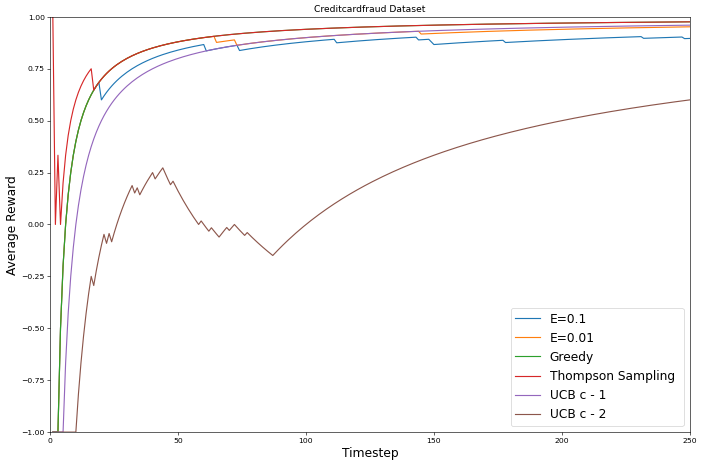

In [39]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(eg['average_reward-0.1'], label="E=0.1")
plt.plot(eg['average_reward-0.01'], label="E=0.01")
plt.plot(g['average_reward'],  label='Greedy')
plt.plot(ts['average_reward'], label='Thompson Sampling ')
plt.plot(ucb['average_reward1'], label='UCB c - 1  ')
plt.plot(ucb['average_reward2'], label='UCB c - 2')
plt.title('Creditcardfraud Dataset')

plt.plot(label='Square') 
plt.xlabel('Timestep', fontsize=16)
plt.ylabel('Average Reward', fontsize=16)
plt.axis([0,250, -1, 1])

plt.legend(loc="lower right", fontsize=16)
plt.show()

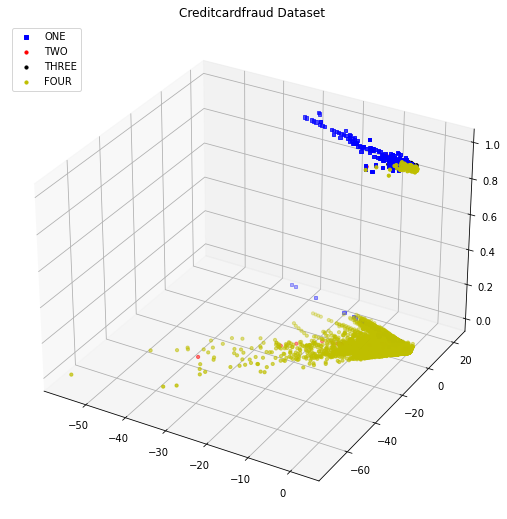

In [40]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(one['V1'], one['V2'],one['Class'], s=10, c='b', marker="s", label='ONE')
ax.scatter3D(two['V1'], two['V2'],two['Class'], s=10, c='r', marker="o", label='TWO')
ax.scatter3D(three['V1'], three['V2'],three['Class'], s=10, c='black', marker="o", label='THREE')
ax.scatter3D(four['V1'], four['V2'],four['Class'], s=10, c='y', marker="o", label='FOUR')
plt.legend(loc='upper left');
plt.title('Creditcardfraud Dataset')
plt.show()

In [41]:
test2=test
test2=test.drop('Class',axis=1)

In [42]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(train.iloc[:,0:28], train['Class'])
# Predicting the model
pred_logit= logit.predict(test2)

In [43]:
lr=pd.DataFrame()
lr['lr_class']=pred_logit
lr["index"] = range(1, len(lr) + 1)
lr = lr.set_index("index")
lr['actual_class']=test['Class']
lr['diff']=lr['actual_class']-lr['lr_class']
lr['pp']=100
lr['pp'] = np.where(lr['pp'] == 1,0, lr['pp'])
lr['pp'] = np.where(lr['diff'] == 1,-10*lr['pp'], lr['pp'] )
lr['lr_profit']=lr['pp'].cumsum()

In [44]:
calp=pd.DataFrame(test['Class'])
calp['Amount']=''
calp['Amount'] = np.where(calp['Class'] == 1,-1000, calp['Amount'] )
calp['Amount'] = np.where(calp['Class'] == 0, 100, calp['Amount'] )
calp['cum_profit']=calp['Amount'].cumsum()

In [45]:
profits=pd.DataFrame()
profits['TS']=testprofitts
profits['TS']=profits['TS'].cumsum()
profits['G']=gprofit
profits['G']=profits['G'].cumsum()
profits['E1']=eprofit1
profits['E1']=profits['E1'].cumsum()
profits['E2']=eprofit1
profits['E2']=profits['E2'].cumsum()
profits['C2']=ucbprofit2
profits['C2']=profits['C2'].cumsum()
profits['C1']=ucbprofit1
profits['C1']=profits['C1'].cumsum()

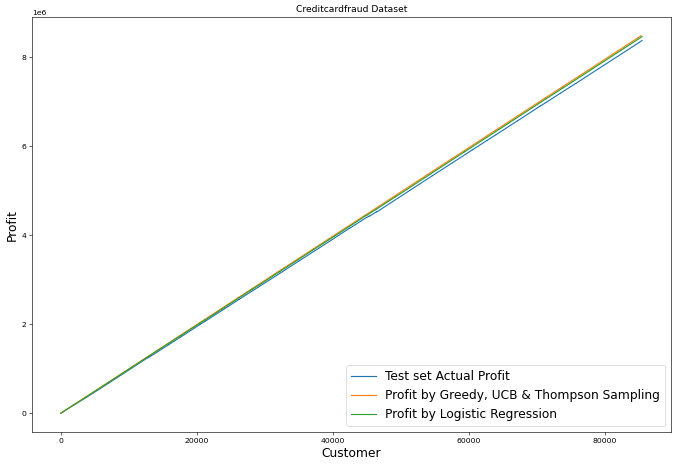

In [46]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(calp['cum_profit'], label="Test set Actual Profit")
plt.plot(profits['TS'], label="Profit by Greedy, UCB & Thompson Sampling")
plt.plot(lr['lr_profit'], label="Profit by Logistic Regression")


plt.plot(label='Square') 
plt.xlabel('Customer', fontsize=16)
plt.ylabel('Profit', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('Creditcardfraud Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

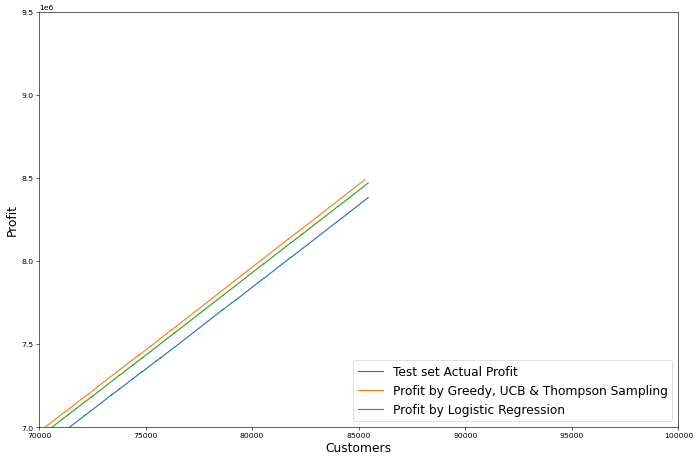

In [47]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(calp['cum_profit'], label="Test set Actual Profit")
plt.plot(profits['TS'], label="Profit by Greedy, UCB & Thompson Sampling")
plt.plot(lr['lr_profit'], label="Profit by Logistic Regression")
plt.plot(label='Square') 
plt.xlabel('Customers', fontsize=16)
plt.ylabel('Profit', fontsize=16)
plt.axis([70000, 100000, 7000000, 9500000])
plt.legend(loc="lower right", fontsize=16)
plt.show()

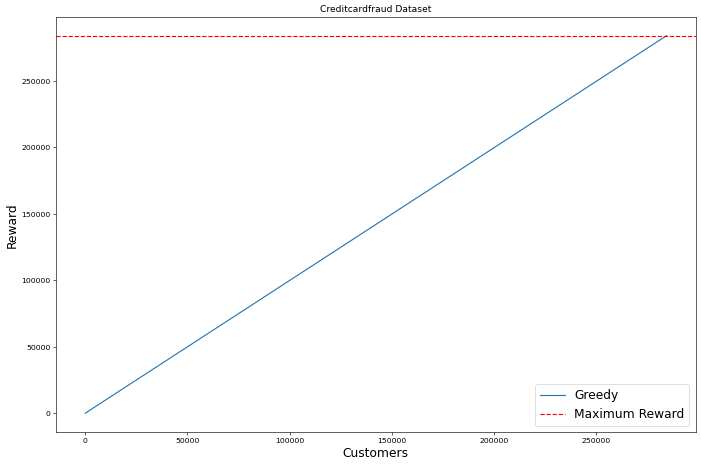

In [71]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(g['cum_reward'], label="Greedy")
plt.axhline(y=284081, color='r', linestyle='dashed',label="Maximum Reward")
plt.plot(label='Square') 
plt.xlabel('Customers', fontsize=16)
plt.ylabel('Reward', fontsize=16)
plt.title('Creditcardfraud Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()